In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/
! mkdir Polynomial_folder

/content/drive/MyDrive
mkdir: cannot create directory ‘Polynomial_folder’: File exists


In [4]:
!pwd

/content/drive/MyDrive


In [5]:
%cd Polynomial_folder/

/content/drive/MyDrive/Polynomial_folder


In [6]:
#%cp /Polynomial_train.csv /content/drive/MyDrive/Polynomial_folder
#%cp /Polynomial_test.csv /content/drive/MyDrive/Polynomial_folder


In [7]:
! ls

Polynomial_test.csv  Polynomial_train.csv


In [8]:
train_path='/content/drive/MyDrive/Polynomial_folder/Polynomial_train.csv'
test_path='/content/drive/MyDrive/Polynomial_folder/Polynomial_test.csv'
train= pd.read_csv(train_path)
test=pd.read_csv(test_path)


train.head()

,Unnamed: 0,X,Y,Z,label
0,0,0.643715,-9.866550,-5.836019,307.972927
1,1,-1.366446,-3.761945,-8.756162,136.398375
2,2,-4.090270,-1.836218,-1.846066,-310.724813
3,3,-8.730478,-1.923651,3.892972,1.755447
4,4,5.367169,0.358357,6.703989,-343.582590


In [9]:
for col in train.columns:
  col_mean=train[col].mean()
  train[col].fillna(value=col_mean, inplace=True)
for col in test.columns:
   col_mean=test[col].mean()
   test[col].fillna(value=col_mean, inplace=True)

In [10]:
test.head()

,Unnamed: 0,X,Y,Z,label
0,0,9.322078,0.413096,5.984731,-657.669309
1,1,2.811964,6.142752,6.419237,-545.362524
2,2,-2.669784,7.775091,-6.931907,-75.044187
3,3,-6.992156,-9.205548,0.852580,-2403.124902
4,4,1.574294,-2.213266,6.029188,8.595325


In [11]:
test.isnull().sum().sum()

0

In [12]:
train.isnull().sum().sum()

0

In [13]:
#Normalization
train = train.copy()

for column in train.columns:
    train[column] = train[column]  / train[column].abs().max()
      

display(train)

,Unnamed: 0,X,Y,Z,label
0,0.00000,0.017925,-0.818063,-0.580098,0.060781
1,0.00002,-0.038050,-0.311913,-0.870359,0.026920
2,0.00004,-0.113896,-0.152246,-0.183498,-0.061324
3,0.00006,-0.243106,-0.159495,0.386960,0.000346
4,0.00008,0.149452,0.029712,0.666374,-0.067809
...,...,...,...,...,...
49995,0.99992,0.075013,-0.112984,-0.734858,0.134877
49996,0.99994,-0.258134,-0.452449,-0.232941,-0.369928
49997,0.99996,0.184248,-0.236077,-0.050101,0.131022
49998,0.99998,0.099080,0.373732,-0.479471,-0.083089


In [14]:
#Normalization
test = test.copy()

for column in test.columns:
    test[column] = test[column]  / test[column].abs().max()
      

display(test)

,Unnamed: 0,X,Y,Z,label
0,0.0000,0.932229,0.041314,0.598522,-0.132651
1,0.0001,0.281203,0.614335,0.641976,-0.109999
2,0.0002,-0.266984,0.777585,-0.693247,-0.015136
3,0.0003,-0.699231,-0.920645,0.085265,-0.484705
4,0.0004,0.157433,-0.221348,0.602968,0.001734
...,...,...,...,...,...
9995,0.9996,-0.099247,-0.785445,0.774879,-0.128079
9996,0.9997,0.857465,0.627253,-0.573543,-0.257337
9997,0.9998,0.664115,0.686555,0.451205,-0.357336
9998,0.9999,-0.626256,0.132333,-0.391807,-0.004588


In [15]:
testf=test.drop(["label", "Unnamed: 0"], axis=1)
testf

,X,Y,Z
0,0.932229,0.041314,0.598522
1,0.281203,0.614335,0.641976
2,-0.266984,0.777585,-0.693247
3,-0.699231,-0.920645,0.085265
4,0.157433,-0.221348,0.602968
...,...,...,...
9995,-0.099247,-0.785445,0.774879
9996,0.857465,0.627253,-0.573543
9997,0.664115,0.686555,0.451205
9998,-0.626256,0.132333,-0.391807


In [16]:
len(train)

50000

In [17]:

X_train=train["X"]
X_train.head()

0    0.017925
1   -0.038050
2   -0.113896
3   -0.243106
4    0.149452
Name: X, dtype: float64

In [18]:
Y_train=train["Y"]
Y_train.head()

0   -0.818063
1   -0.311913
2   -0.152246
3   -0.159495
4    0.029712
Name: Y, dtype: float64

In [19]:
Z_train=train["Z"]
Z_train.head()

0   -0.580098
1   -0.870359
2   -0.183498
3    0.386960
4    0.666374
Name: Z, dtype: float64

In [20]:
label=test["label"]
label

0      -0.132651
1      -0.109999
2      -0.015136
3      -0.484705
4       0.001734
          ...   
9995   -0.128079
9996   -0.257337
9997   -0.357336
9998   -0.004588
9999   -0.013081
Name: label, Length: 10000, dtype: float64

In [21]:
train['X_square']=train['X']**2
train['Y_square']=train['Y']**2
train['Z_square']=train['Z']**2
train["X*Y"] = train["X"] * train["Y"]
train["X*Z"] = train["X"] * train["Z"]
train["Y*Z"] = train["Y"] * train["Z"]
print(train)

       Unnamed: 0         X         Y         Z     label  X_square  Y_square  \
0         0.00000  0.017925 -0.818063 -0.580098  0.060781  0.000321  0.669228   
1         0.00002 -0.038050 -0.311913 -0.870359  0.026920  0.001448  0.097290   
2         0.00004 -0.113896 -0.152246 -0.183498 -0.061324  0.012972  0.023179   
3         0.00006 -0.243106 -0.159495  0.386960  0.000346  0.059100  0.025439   
4         0.00008  0.149452  0.029712  0.666374 -0.067809  0.022336  0.000883   
...           ...       ...       ...       ...       ...       ...       ...   
49995     0.99992  0.075013 -0.112984 -0.734858  0.134877  0.005627  0.012765   
49996     0.99994 -0.258134 -0.452449 -0.232941 -0.369928  0.066633  0.204710   
49997     0.99996  0.184248 -0.236077 -0.050101  0.131022  0.033947  0.055732   
49998     0.99998  0.099080  0.373732 -0.479471 -0.083089  0.009817  0.139675   
49999     1.00000  0.017360  0.734876 -0.321164 -0.138096  0.000301  0.540042   

       Z_square       X*Y  

In [22]:
P=train.drop(["label", "Unnamed: 0"], axis=1)
P.head()  

,X,Y,Z,X_square,Y_square,Z_square,X*Y,X*Z,Y*Z
0,0.017925,-0.818063,-0.580098,0.000321,0.669228,0.336514,-0.014664,-0.010398,0.474557
1,-0.038050,-0.311913,-0.870359,0.001448,0.097290,0.757525,0.011868,0.033117,0.271477
2,-0.113896,-0.152246,-0.183498,0.012972,0.023179,0.033672,0.017340,0.020900,0.027937
3,-0.243106,-0.159495,0.386960,0.059100,0.025439,0.149738,0.038774,-0.094072,-0.061718
4,0.149452,0.029712,0.666374,0.022336,0.000883,0.444054,0.004441,0.099591,0.019800


In [23]:
obt=train["label"]
obt.head()

0    0.060781
1    0.026920
2   -0.061324
3    0.000346
4   -0.067809
Name: label, dtype: float64

In [24]:
print(obt.size)
obt = np.vstack((np.ones((obt.shape[0], )), obt.T)).T
print(obt.shape)


50000
(50000, 2)


In [25]:
P = np.vstack((np.ones((P.shape[0], )), P.T)).T
print(P.shape)
print(P.shape[1])

(50000, 10)
10


In [26]:
def mdl(P, obt, lr , i):
  m = obt.size
  theta = np.zeros((P.shape[1], 1))

  clist = []
  j=1
  while(j<=i):
       
     pred = np.dot(P, theta)#(50000,1)
     cost = (1/(2*m))*np.sum(np.square(pred - obt))#
     d_theta = (1/m)*np.dot(P.T, pred - obt)
     theta = theta - lr*d_theta
     clist.append(cost)
     
     
     if(j%(i//10) == 0):
      print("Cost is :", cost)
     j=j+1
  return theta, clist

In [27]:
i = 600
lr = 0.01
theta, clist = mdl(P, obt, lr=lr , i=i)

Cost is : 0.1399908545687716
Cost is : 0.0771952610758213
Cost is : 0.04612939569771517
Cost is : 0.030720099490477312
Cost is : 0.023037545869684192
Cost is : 0.019169436320243104
Cost is : 0.017185529617714797
Cost is : 0.016133439622812905
Cost is : 0.015543210683770159
Cost is : 0.015182899097830983


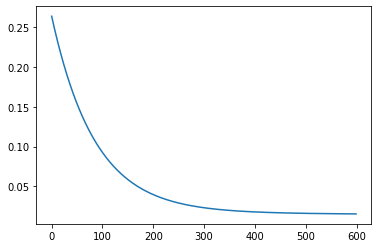

In [28]:
rng = np.arange(0, i)
plt.plot(rng, clist)
plt.show()

In [29]:
pred=np.dot(P, theta)

In [30]:
f=((obt-pred)*(obt-pred))

In [31]:
e=np.sum(f)

In [32]:
s=testf.shape[0]
s

10000

In [33]:
RMSE=(1/s)*math.sqrt(e)
RMSE

0.005509643608261408